<h1>Team GCU 탐프지옥</h1>  
<h1>Data Analysus</h1>

In [104]:
import pandas as pd
import numpy as np
import jsonlines

import matplotlib.pyplot as plt
import koreanize_matplotlib


In [105]:
entity_property_pair = [
    '제품 전체#품질', '제품 전체#디자인','제품 전체#다양성','제품 전체#인지도','제품 전체#일반','제품 전체#편의성','제품 전체#가격',
    '패키지/구성품#디자인',  '패키지/구성품#가격','패키지/구성품#다양성', '패키지/구성품#일반','패키지/구성품#편의성','패키지/구성품#품질',  
    '본품#일반',  '본품#다양성', '본품#품질', '본품#인지도', '본품#편의성',  '본품#디자인', '본품#가격',
    '브랜드#일반',  '브랜드#인지도', '브랜드#디자인',  '브랜드#품질', '브랜드#가격' ]

polarity = ['positive', 'negative', 'neutral']

train_data = {
    'form_length':[],
    'entity':dict.fromkeys(entity_property_pair, 0),
    'polarity':dict.fromkeys(polarity, 0)
}

dev_data = {
    'form_length':[],
    'entity':dict.fromkeys(entity_property_pair, 0),
    'polarity':dict.fromkeys(polarity, 0)
}

with jsonlines.open('dataset/task_ABSA/nikluge-sa-2022-train.jsonl') as f:
        for line in f.iter():
            train_data['form_length'].append(len(line['sentence_form']))
            for annotation in line['annotation']:
                train_data['entity'][annotation[0]] +=1
                train_data['polarity'][annotation[-1]]+=1
                
with jsonlines.open('dataset/task_ABSA/nikluge-sa-2022-dev.jsonl') as f:
        for line in f.iter():
            dev_data['form_length'].append(len(line['sentence_form']))
            for annotation in line['annotation']:
                dev_data['entity'][annotation[0]] +=1
                dev_data['polarity'][annotation[-1]]+=1

<h2>학습 데이터셋 분석</h2>

문장 길이 평균 평균: 36.07277397260274, 최대 문장 길이: 188


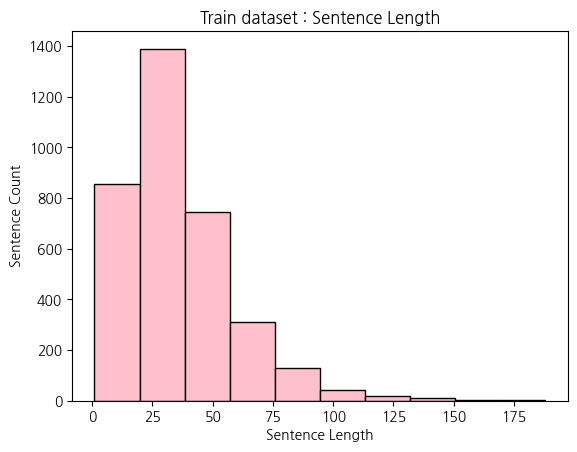

In [106]:
plt.title("Train dataset : Sentence Length")
print("문장 길이 평균 평균: {}, 최대 문장 길이: {}".format(np.mean(train_data['form_length']), max(train_data['form_length'])))
plt.hist(train_data['form_length'], bins=10, edgecolor='black', linewidth=1, color='pink')
plt.xlabel('Sentence Length')
plt.ylabel('Sentence Count')
plt.show()


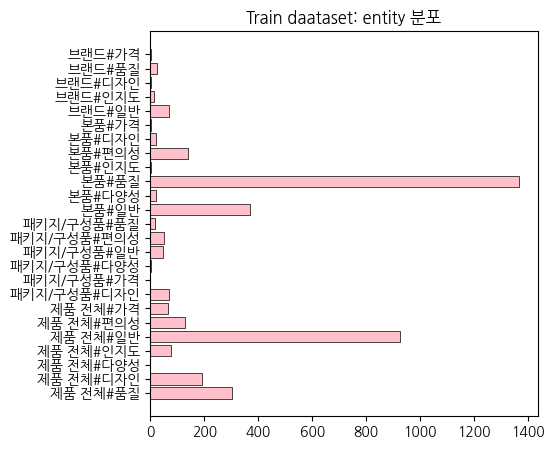

In [111]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(entity_property_pair,train_data['entity'].values(), edgecolor='black', linewidth=0.5, color='pink')
ax.set_title("학습 데이터셋: entity 분포")
plt.show()

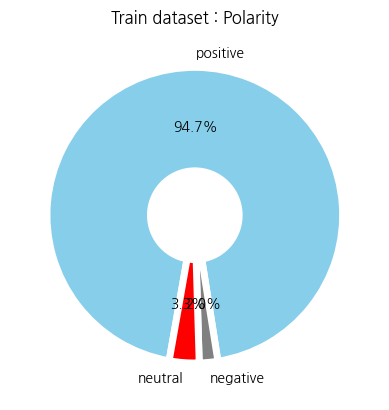

In [125]:
pie_colors = ['skyblue', 'gray', 'red']


plt.title("Train dataset : Polarity")
plt.pie(train_data['polarity'].values(), labels=polarity, autopct='%.1f%%', startangle=260, counterclock=False, colors=pie_colors, wedgeprops=wedgeprops)
plt.show()



<h2>평가 데이터셋 분석</h2>

문장 길이 평균 평균: 34.47029348604152, 최대 문장 길이: 174


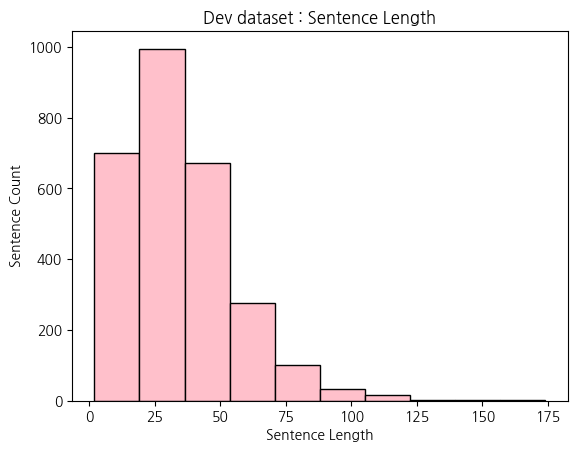

In [109]:
plt.title("Dev dataset : Sentence Length")
print("문장 길이 평균 평균: {}, 최대 문장 길이: {}".format(np.mean(dev_data['form_length']), max(dev_data['form_length'])))
plt.hist(dev_data['form_length'], bins=10, edgecolor='black', linewidth=1, color='pink')
plt.xlabel('Sentence Length')
plt.ylabel('Sentence Count')
plt.show()

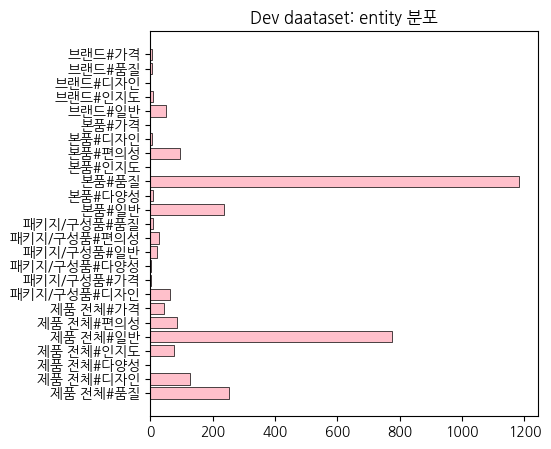

In [112]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(entity_property_pair,dev_data['entity'].values(), edgecolor='black', linewidth=0.5, color='pink')
ax.set_title("평가 데이터셋: entity 분포")
plt.show()

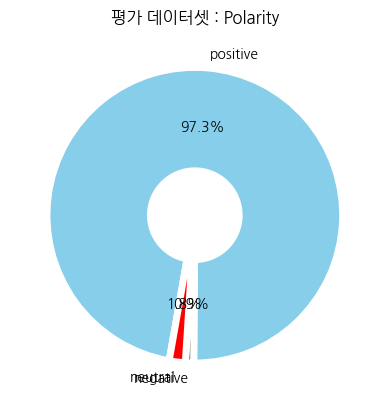

In [124]:
pie_colors = ['skyblue', 'gray', 'red']


plt.title('평가 데이터셋 : Polarity')
plt.pie(dev_data['polarity'].values(), labels=polarity, autopct='%.1f%%', startangle=260, counterclock=False, colors=pie_colors, wedgeprops=wedgeprops)
plt.show()

<h1>최종 제출 데이터셋</h1>

In [113]:
pred_data = {
    'form_length':[],
    'entity':dict.fromkeys(entity_property_pair, 0),
    'polarity':dict.fromkeys(polarity, 0)
}

with jsonlines.open('final.jsonl') as f:
        for line in f.iter():
            pred_data['form_length'].append(len(line['sentence_form']))
            for annotation in line['annotation']:
                pred_data['entity'][annotation[0]] +=1
                pred_data['polarity'][annotation[-1]]+=1

문장 길이 평균 평균: 45.09308885754584, 최대 문장 길이: 207


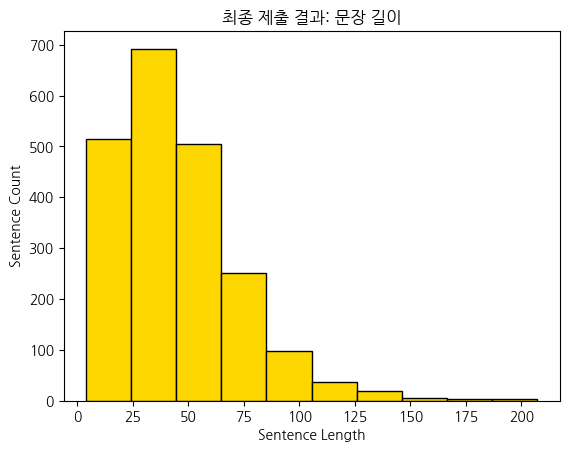

In [129]:
plt.title("최종 제출 결과: 문장 길이")
print("문장 길이 평균 평균: {}, 최대 문장 길이: {}".format(np.mean(pred_data['form_length']), max(pred_data['form_length'])))
plt.hist(pred_data['form_length'], bins=10, edgecolor='black', linewidth=1, color='gold')
plt.xlabel('Sentence Length')
plt.ylabel('Sentence Count')
plt.show()

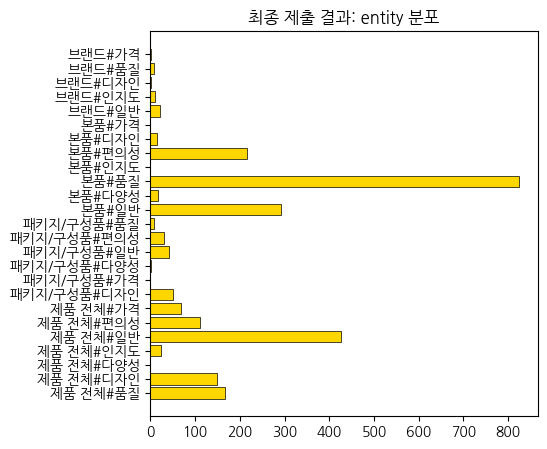

In [130]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(entity_property_pair,pred_data['entity'].values(), edgecolor='black', linewidth=0.5, color='gold')
ax.set_title("최종 제출 결과: entity 분포")
plt.show()

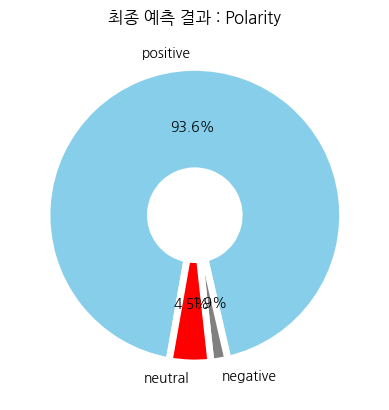

In [133]:
pie_colors = ['skyblue', 'gray', 'red']


plt.title('최종 예측 결과 : Polarity')
plt.pie(pred_data['polarity'].values(), labels=polarity, autopct='%.1f%%', startangle=260, counterclock=False, colors=pie_colors, wedgeprops=wedgeprops)
plt.show()